# 控制系统-03-控制系统建模

### 绘图测试

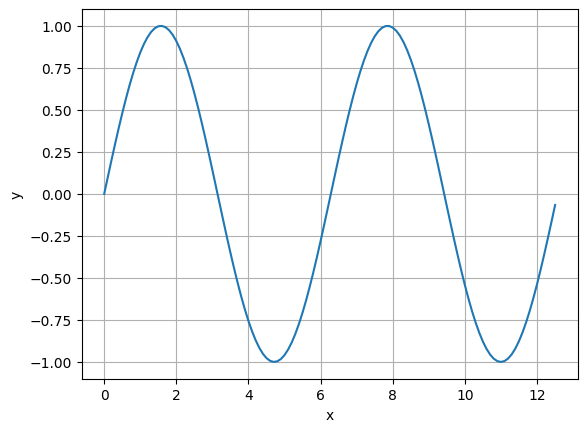

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 


x = np.arange(0,4*np.pi ,0.1)
y = np.sin(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### scipy测试


$\dot y(t)=-\frac15y(t)+\frac15u(t)$

$u(t)=0 \ \  when \ \  t<10 $

$u(t)=1\ \   when\ \   t \geq 10 $


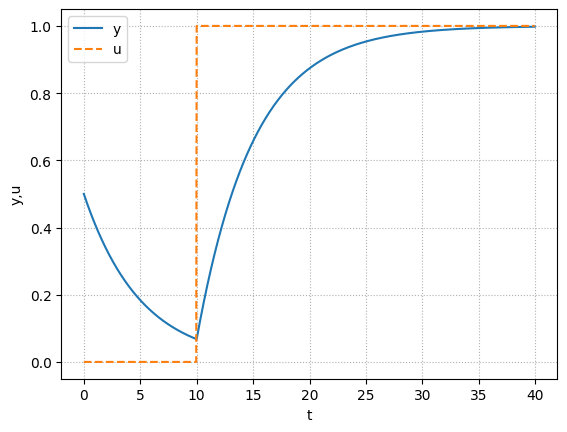

In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def system(y,t):
    u = 1.0
    if t < 10.0:
        u=0.0
    dydt = (-y+u)/5.0
    return dydt

y0 = 0.5
t=np.arange(0,40,0.04)
y=odeint(system,y0,t)

fig,ax = plt.subplots()
ax.plot(t,y,label='y')
ax.plot(t,1*(t>=10),ls='--',label='u')
ax.set_xlabel('t')
ax.set_ylabel('y,u')
ax.legend(loc='best')
ax.grid(ls=':')

    

### control库测试

#### 建立传递函数

In [ ]:
import control.matlab as cm
# from control.matlab import *
# 建立传递函数 
Np=[1,2]
Dp=[1,5,3,4]
P=cm.tf(Np,Dp)
print(P)

#查看传递函数的分子和分母
[[numP]],[[denP]] =cm. tfdata(P)
print(numP)
print(denP)


        s + 2
---------------------
s^3 + 5 s^2 + 3 s + 4

[1 2]
[1 5 3 4]


#### 建立状态空间模型

In [1]:
import control.matlab as cm 
import control as ct
import numpy as np

# from control.matlab import * 
A = np.array([[0,1],[-1,-1]])  
B = np.array([[0],[1]])   
C = np.array([[1,0]])   
D = np.array([[0]])   
 
P= ct.ss(A,B,C,D)
sysA,sysB,sysC,sysD = ct.ssdata(P)
print(sysA)
print(f"\nA:{sysA}\nB:{sysB}\nC:{sysC}\nD:{sysD}")

[[ 0.  1.]
 [-1. -1.]]

A:[[ 0.  1.]
 [-1. -1.]]
B:[[0.]
 [1.]]
C:[[1. 0.]]
D:[[0.]]


#### 传递函数 串并联 反馈关系

In [46]:
import control as ct
s1=ct.tf([0,1],[1,1])
s2=ct.tf([1,1],[1,1,1])

#串联
print( "series==================")
s=s1*s2
print(f"s={s}")
s = ct.series(s1,s2)
print(f"s={s}")

#并联
print( "parallel==================")
s=s1+s2
print(f"s={s}")
s=ct.parallel(s1,s2)
print(f"s={s}")

print( "feedback==================")
s=s1/(1+s1*s2)
print(f"s={s}")
print(f"s minreal ={s.minreal()}")
s=ct.feedback(s1,s2)
print(f"s={s}")


series==================
s=
        s + 1
---------------------
s^3 + 2 s^2 + 2 s + 1

s=
        s + 1
---------------------
s^3 + 2 s^2 + 2 s + 1

parallel==================
s=
   2 s^2 + 3 s + 2
---------------------
s^3 + 2 s^2 + 2 s + 1

s=
   2 s^2 + 3 s + 2
---------------------
s^3 + 2 s^2 + 2 s + 1

feedback==================
s=
    s^3 + 2 s^2 + 2 s + 1
-----------------------------
s^4 + 3 s^3 + 5 s^2 + 5 s + 2

s minreal =
     s^2 + s + 1
---------------------
s^3 + 2 s^2 + 3 s + 2

s=
     s^2 + s + 1
---------------------
s^3 + 2 s^2 + 3 s + 2



In [50]:
import control as ct
s1=ct.tf([0,1],[1,1])
s2=ct.tf([0,1],[1,2])
s3=ct.tf([3,1],[1,0])
s4=ct.tf([2,0],[0,1])

s12 = ct.feedback(s1,s2)
s123 = ct.series(s12,s3)
s = ct.feedback(s123,s4)

print(s)




  3 s^2 + 7 s + 2
--------------------
7 s^3 + 17 s^2 + 7 s



#### 状态空间和传递函数 互转

In [52]:
p=ct.tf([0,1],[1,1,1])
pss= ct.tf2ss(p)
print(pss)
ptf=ct.ss2tf(pss)
print(ptf)


A = [[-1. -1.]
     [ 1.  0.]]

B = [[1.]
     [0.]]

C = [[0. 1.]]

D = [[0.]]


     1
-----------
s^2 + s + 1



#### 传递函数转状态空间的两种规范型

In [ ]:
 
A = np.array([[1,2,3],[3,2,1],[4,5,0]])  
B = np.array([[1],[0],[1]])   
C = np.array([[0,2,1]])   
D = np.array([[0]])   
 
pss= ct.ss(A,B,C,D)
#可控规范型
pr , t = ct.canonical_form(pss,form='reachable')
print(pr)
#可观测规范型
po , t = ct.canonical_form(pss,form='observable')
print(po)


A = [[ 3. 21. 24.]
     [ 1.  0.  0.]
     [ 0.  1.  0.]]

B = [[1.]
     [0.]
     [0.]]

C = [[ 1.  9. 27.]]

D = [[0.]]

A = [[ 3.  1.  0.]
     [21.  0.  1.]
     [24.  0.  0.]]

B = [[ 1.]
     [ 9.]
     [27.]]

C = [[1. 0. 0.]]

D = [[0.]]



> 传递函数分母次数小于分子次数 则为非真分系统  无法转为 状态空间模型